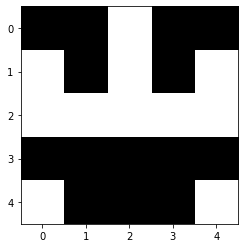

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

sprite = np.zeros((5,5))

for i in range(5):
    for j in range(3):
        sprite[i,j] = random.randint(0,1)
        sprite[i,4-j] = sprite[i,j]

plt.imshow(sprite, cmap='gray')
plt.show()


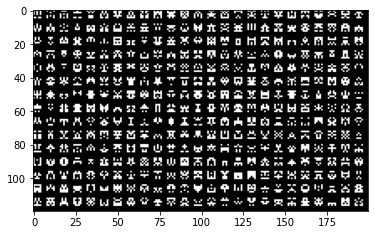

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
 
def draw_sprite(canvas, x, y):
    sprite = np.zeros((5,5))
 
    for i in range(5):
        for j in range(3):
            sprite[i,j] = random.randint(0,1)
            sprite[i,4-j] = sprite[i,j]
    canvas[x:x+5,y:y+5] = sprite
 

d1 = 15
d2 = 25
canvas = np.zeros((d1*5+d1*3,d2*5+d2*3))
for i in range(0, d1*5+d1*3, 8):
    for j in range(0, d2*5+d2*3, 8):
        draw_sprite(canvas, i, j)
 
plt.imshow(canvas, cmap='gray')
plt.show()


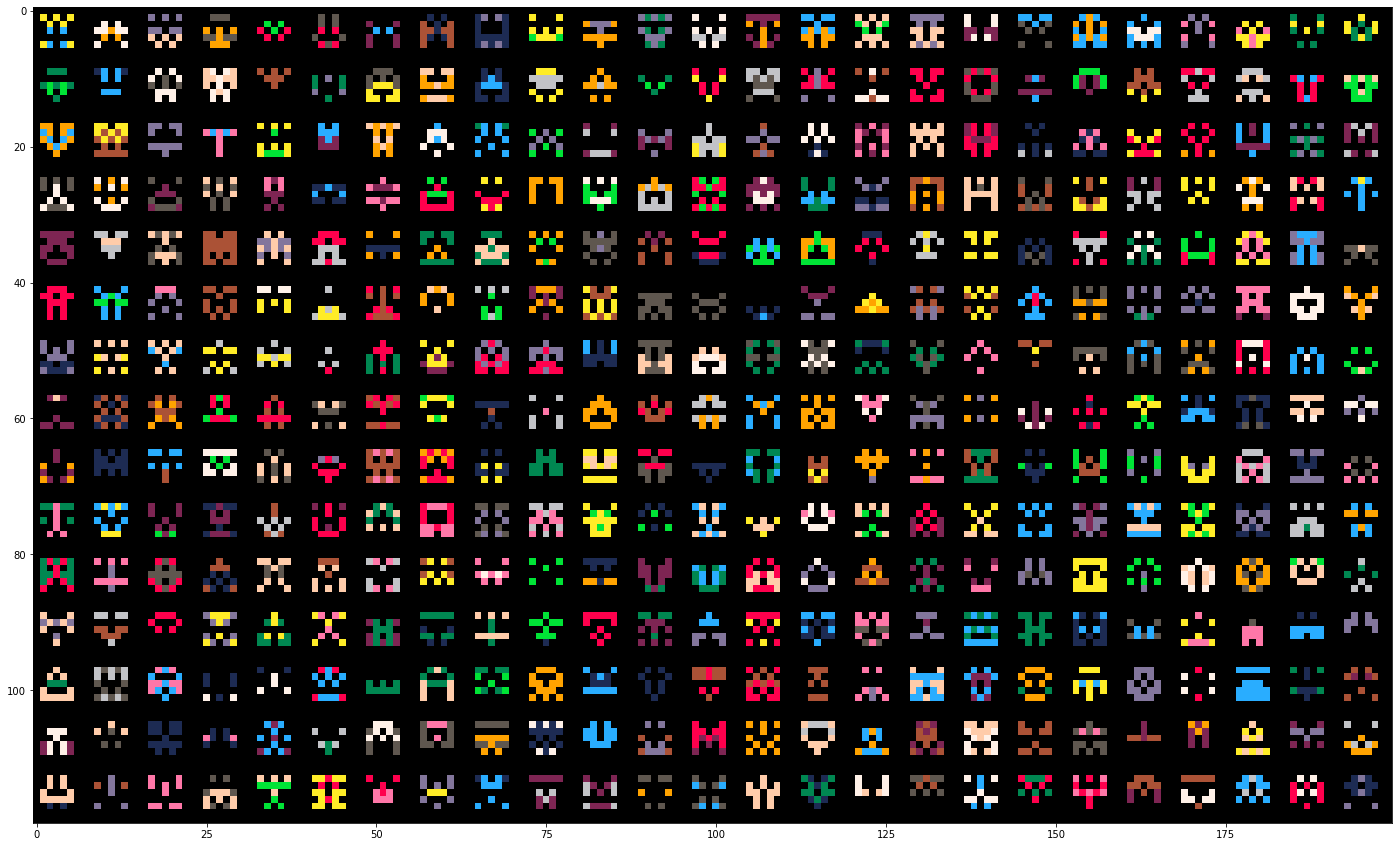

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
 
colors = [
    (29, 43, 83),   # Темно-синий
    (126, 37, 83),  # Темно-малиновый
    (0, 135, 81),   # Темно-зеленый
    (171, 82, 54),  # Темно-коричневый
    (95, 87, 79),   # Темно-серый
    (194, 195, 199),# Светло-серый
    (255, 241, 232),# Светло-кремовый
    (255, 0, 77),   # Ярко-красный
    (255, 163, 0),  # Ярко-оранжевый
    (255, 236, 39), # Ярко-желтый
    (0, 228, 54),   # Ярко-зеленый
    (41, 173, 255), # Ярко-синий
    (131, 118, 156),# Фиолетовый
    (255, 119, 168),# Розовый
    (255, 204, 170) # Светло-оранжевый
]
 
def draw_sprite(canvas, x, y):
    sprite = np.zeros((5,5))
    c = [np.array(colors[random.randint(0, len(colors)-1)]), 
         np.array(colors[random.randint(0, len(colors)-1)])]
    for i in range(5):
        for j in range(3):
            sprite[i,j] = random.randint(0,1)
            sprite[i,4-j] = sprite[i,j]
    for i in range(5):
        for j in range(5):
            if sprite[i,j] == 1:
                canvas[x+i, y+j] = c[random.randint(0,1)]
                canvas[x+i, y+4-j] = canvas[x+i, y+j]
    canvas[x:x+5,y:y+5][sprite==0] = 0
 

d1 = 15
d2 = 25
canvas = np.zeros((d1*5+d1*3,d2*5+d2*3,3), dtype=np.uint8)
for i in range(1, d1*5+d1*3, 8):
    for j in range(1, d2*5+d2*3, 8):
        draw_sprite(canvas, i, j)
fig = plt.figure(figsize=(d2, d1))
plt.imshow(canvas)
plt.show()

In [1]:
from PIL import Image


def read_img(filename):
    img = Image.open(filename).convert('RGB')
    pixels = [[img.getpixel((x, y)) for x in range(img.width)] for y in range(img.height)]
    return pixels

    

# 2.8

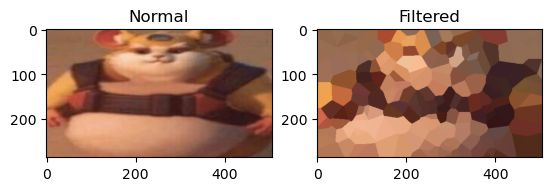

In [55]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt


def read_img(filename):
    img = Image.open(filename).convert('RGB')
    pixels = [[img.getpixel((x, y)) for x in range(img.width)] for y in range(img.height)]
    return pixels

def distance_e(x, y, x0, y0):
    return np.sqrt((x - x0)**2 + (y - y0)**2)
    
    
def voronoi_filter(image_path, n_points):
    image = np.array(read_img(image_path))
    height, width, channels = image.shape
    filtered_image = np.zeros((height, width, channels), dtype=np.uint8)

    points = []
    for i in range(n_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        points.append((x, y))

    for x in range(width):
        for y in range(height):
            distances = []
            for point in points:
                distance = distance_e(x, y, point[0], point[1])
                distances.append(distance)

            min_distance = min(distances)
            min_index = distances.index(min_distance)
            nearest_point = points[min_index]

            filtered_image[y, x] = image[nearest_point[1], nearest_point[0]]

    return filtered_image

n_points = 200
image_path = "maxresdefault12.png"
filtered_image = voronoi_filter(image_path, n_points)
normal_image = np.array(read_img(image_path))

fig, (norm, filt) = plt.subplots(1, 2)

norm.imshow(normal_image)
norm.set_title('Normal')

filt.imshow(filtered_image)
filt.set_title('Filtered')

plt.show()

# 3.11

1994    539
1992    526
1993    493
1990    488
1995    483
1989    442
1991    407
1996    403
1988    316
1997    253
1987    237
1986    115
1984     91
1983     85
1998     82
1985     80
1982     54
1999     38
2001     30
2000     29
2002     17
2003      9
1981      8
2004      4
2005      2
2008      2
2007      1
Name: year, dtype: int64


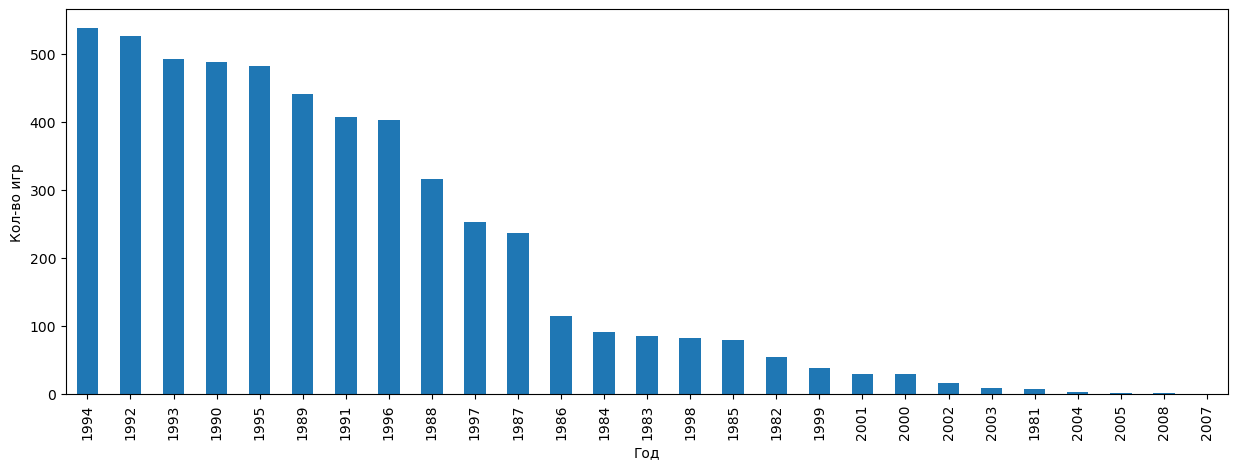

In [34]:
url = "https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv"
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url, header=None, sep=';', names=['title', 'genre', 'link', 'year'])

idx_to_drop = df.loc[df['year'] == "не издана"].index
df = df.drop(index=idx_to_drop)

game_count = df['year'].value_counts()
print(game_count)
game_count.plot(kind='bar', figsize=(15, 5), xlabel='Год', ylabel='Кол-во игр')
plt.show()

# 3.12

genre  Action  Adventure  Arcade  Educational  Fighting  Interactive Fiction  \
year                                                                           
1981      NaN        NaN     1.0          1.0       NaN                  2.0   
1982      2.0        NaN    22.0          1.0       NaN                 12.0   
1983      2.0        1.0    50.0          1.0       NaN                  9.0   
1984      NaN        4.0    39.0          4.0       NaN                 10.0   
1985      NaN        1.0    18.0          NaN       NaN                 16.0   

genre  Other  Puzzle  Quest  RPG  Racing  Simulation  Sports  Strategy  \
year                                                                     
1981     NaN     NaN    NaN  1.0     1.0         NaN     NaN       1.0   
1982     NaN     3.0    1.0  1.0     NaN         3.0     1.0       7.0   
1983     1.0     4.0    NaN  5.0     NaN         NaN     1.0      10.0   
1984     1.0     4.0    1.0  4.0     1.0         5.0     5.0       8.

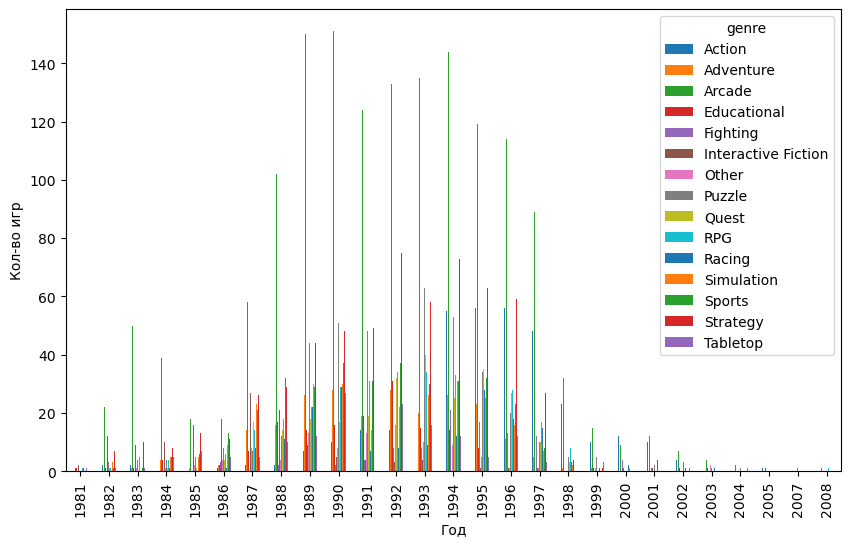

In [50]:
url = "https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv"
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url, header=None, sep=';', names=['title', 'genre', 'link', 'year'])

idx_to_drop = df.loc[df['year'] == "не издана"].index
df = df.drop(index=idx_to_drop)

grouped = df.groupby(['year', 'genre']).size()
print(popularity_by_genre.head())
popularity_by_genre.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

# 3.1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(url):
    df = pd.read_csv(url, header=None, sep=',')
    return df


# id, task, variant, group, time
url_m = "https://raw.githubusercontent.com/true-grue/kispython/main/data/messages.csv"
messages = pd.read_csv(url_m, header=None, sep=',', names=['id', 'task', 'variant', 'group', 'time'])

# id, message_id, time, status
url_c = "https://raw.githubusercontent.com/true-grue/kispython/main/data/checks.csv"
checks = pd.read_csv(url_c, header=None, sep=',', names=['id', 'message_id', 'time', 'status'])

# task, variant, group, time, status, achievements
url_s = "https://raw.githubusercontent.com/true-grue/kispython/main/data/statuses.csv"
statuses = pd.read_csv(url_s, header=None, sep=',')

messages.head()
statuses.head()

,0,1,2,3,4,5
0,0,39,ИВБО-01-21,2023-03-01 09:23:59.531838,3,[]
1,0,38,ИВБО-01-21,2023-02-08 22:10:52.779442,2,[0]
2,0,5,ИКБО-06-21,2023-02-09 10:14:03.199986,2,[2]
3,0,26,ИКБО-06-21,2023-02-09 10:58:38.887360,2,[0]
4,0,21,ИКБО-06-21,2023-02-09 10:24:06.461353,2,[3]


# Воксели!!!!!

In [97]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

'''
0->
|    image[y][x]
v
'''
# загружаем кортиночки. каждый их элемент это
# текстура - (r, g, b), где они от 0 до 255
# карта высот - int примерно от 2000 до 6000, типа высота
heightmap = np.array(Image.open("heightmap.png"))
texture = np.array(Image.open("texture.png").convert("RGB"))

# это будет наше окно итоговое
viewport = np.zeros((420, 640, 3), dtype=np.uint8)

# это для вида лучей сверху
raycast = texture.copy()

In [98]:
# функция рисования лучей красных поверх изображения
# важно - screen_width это количество лучей
# a z задает размеры угла обзора и его длину
def rays_tv(raycast, x, y, screen_width, z):
    red = (255, 0, 0)
    
    # левая и правая координаты дальней части треугольника нажего вида
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    
    height, width, _ = raycast.shape
    
    # шаг, с которым кидаются лучи на самый отдаленный слой
    dx = round(abs(2 * z / screen_width))
    
    # список x-координат лучей на самом дальнем слое
    rays_x = list(range(lp[0], rp[0]+1, dx))
    
    #для каждого слоя, начиная с дальнего
    for yy in range(y-z, y+1):
        # кидаем все лучи в этот слой
        for ray_x in rays_x:
            
            # вычисляем координаты пересечения луча со слоем
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            if (yy >= 0) and (yy < height) and (xx >= 0) and (xx < width):
                #  и красим пиксель
                raycast[yy][xx] = red

In [99]:
# рисует полоску на вьюпорте canvas, цвета color, одну из screen_width (кол-во лучей) начиная с заданных координат и вниз
def draw_strip(canvas, color, start_y, start_x, screen_width):
    height, width, _ = canvas.shape
    start_y = max(0, start_y)
    for x in range(start_x, min(width, start_x + math.ceil(width/screen_width))):
        for y in range(start_y, height):
            canvas[y][x] = color

In [106]:
# функция для выпрямления плоскости
def linear_to_non(value):
    return value ** 0.5
    #return (1-(value-1)**2)**0.5

# отрисовка окна зрения, по сути рендер
def draw_plane(canvas, x, y, screen_width, z, horizon, texture, heightmap, flat=True, minimap=None):
    
    # закрашиваем изначально все голубым
    blue = (0, 127, 255)
    height, width, _ = canvas.shape

    screen_width = min(width, screen_width)
    # размеры карты
    dimens = heightmap.shape
    
    #plane = np.zeros((z, screen_width, 3), dtype=np.uint8)
    for xx in range(width):
        for yy in range(height):
            canvas[yy][xx] = blue
            
    # так же кидаем лучи, теперь не просто для их отображения, но и для построения картинки
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    dx = round(abs(rp[0]-lp[0]) / screen_width)
    print(lp, rp, dx)
    rays_x = list(range(lp[0], rp[0], dx))
    
    # фиксировать цвет будем только то количество раз, сколько пикселей в кадре без горизона
    for start_y in range(horizon, height):
        #n += 1
        
        # находим слой для луча на карте, который будет соответствовать этому ряду в картинке
        yy = y-z + round((start_y - horizon) / (height-horizon) * z)
        for i in range(len(rays_x)):
            
            ray_x = rays_x[i]
            
            # находим пересечение луча со слоем. Проверяем выход за границы
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            if (yy >= 0) and (yy < dimens[0]) and (xx >= 0) and (xx < dimens[1]):
                
                color = texture[yy][xx]
            
                # добавка высоты по карте высот для пикселя
                extra_h = round((heightmap[yy][xx] - 2000) / (60000 - 2000) * horizon - round(horizon*0.5)) * (not flat) + round(horizon*0.3)
                
                # отрисовка полоски
                draw_strip(canvas, color, start_y - extra_h, math.floor(i * width / screen_width), screen_width)
                if not minimap is None:
                    minimap[yy][xx] = blue

In [ ]:
# нарисовали лучи, без картинки
rays_tv(raycast, 500, 1000, 600, 700)

[-500, 0] [1500, 0] 3


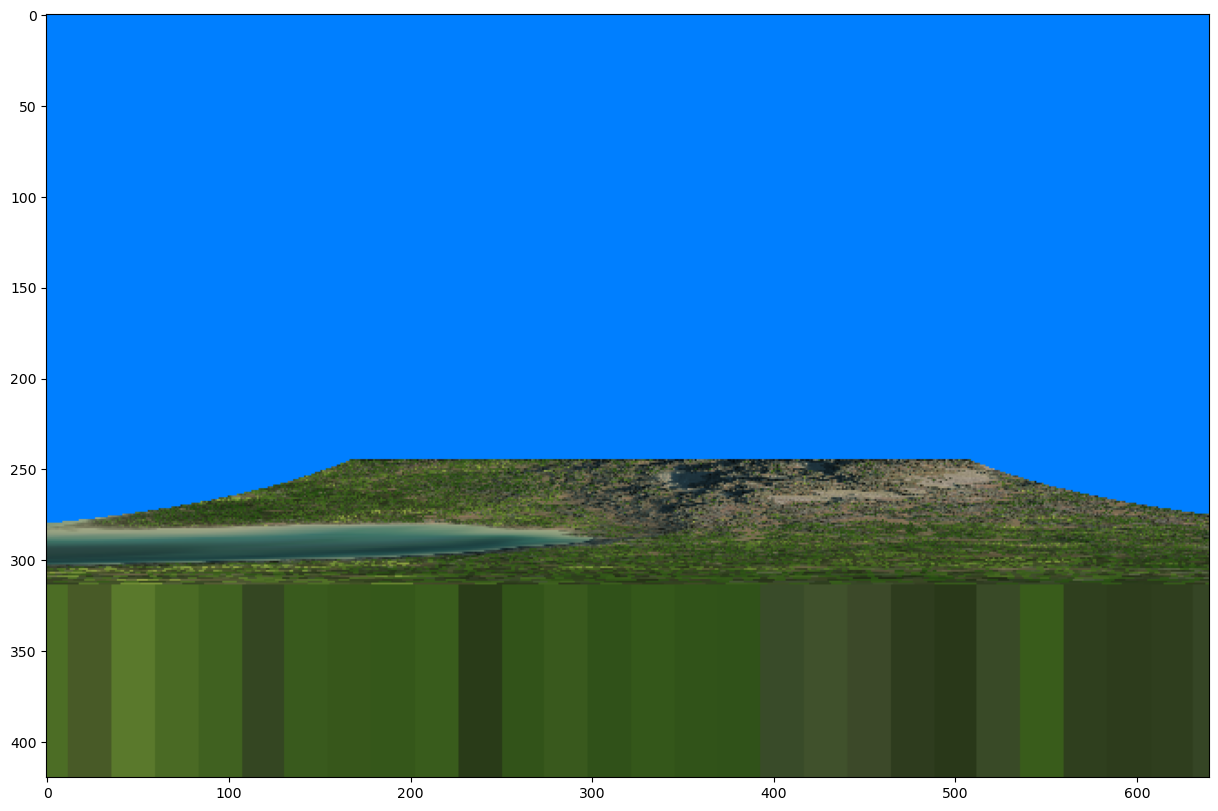

In [107]:
# нарисовали окошко плоское               
draw_plane(canvas=viewport, x=500, y=1000, screen_width=1000, z=1000, horizon=350, texture=texture, heightmap=heightmap, minimap=raycast)

fig = plt.figure(figsize=(15, 10))
plt.imshow(viewport)
plt.show()

[-500, 0] [1500, 0] 3


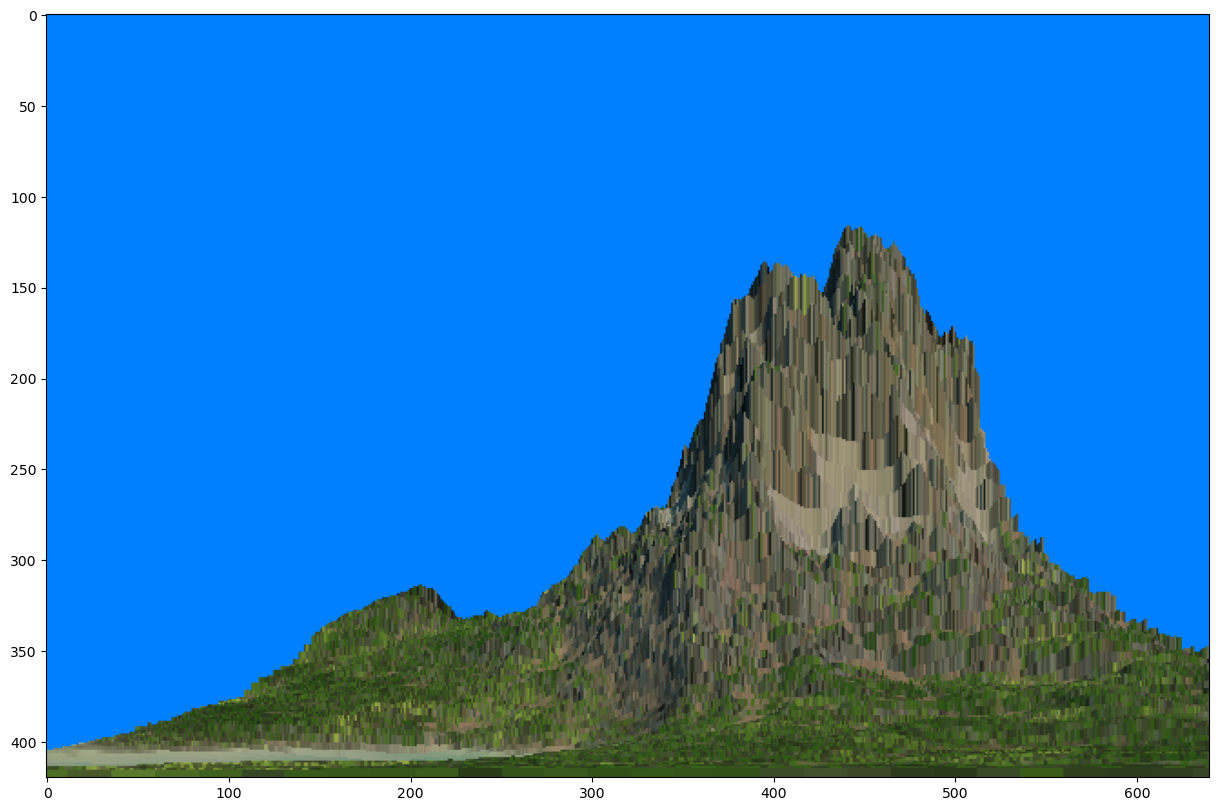

In [108]:
# нарисовали окошко финальное          
draw_plane(canvas=viewport, x=500, y=1000, screen_width=1000, z=1000, horizon=350, texture=texture, heightmap=heightmap, flat=False, minimap=raycast)

fig = plt.figure(figsize=(15, 10))
plt.imshow(viewport)
plt.show()

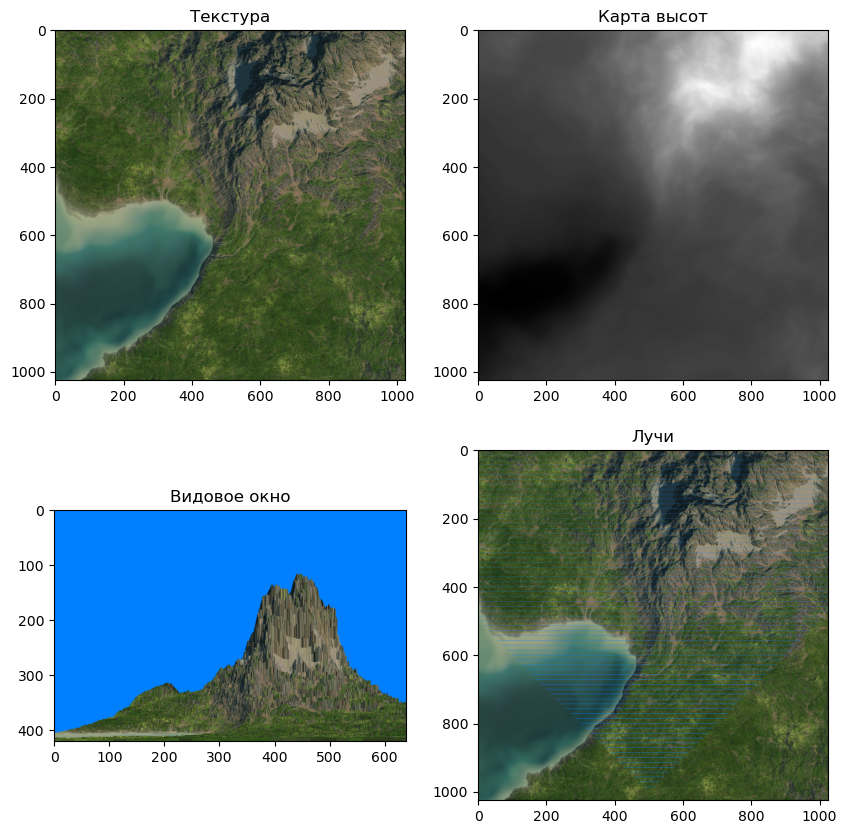

52931
2237


In [109]:
# ну и куда же без общего вывода
fig, ((texture_fig, heightmap_fig), (viewport_fig, raycast_fig)) = plt.subplots(2, 2, figsize=(10, 10))

texture_fig.imshow(texture)
texture_fig.set_title('Текстура')

heightmap_fig.imshow(heightmap, cmap='gray')
heightmap_fig.set_title('Карта высот')

viewport_fig.imshow(viewport)
viewport_fig.set_title('Видовое окно')

raycast_fig.imshow(raycast)
raycast_fig.set_title('Лучи')

plt.show()

print(max([max(row) for row in heightmap]))
print(min([min(row) for row in heightmap]))

In [34]:
n = 0
for i in range(1500, 0, -200):
    #raycast = texture.copy()
    #rays_tv(raycast, 500, i, 600, 700)
    draw_plane(canvas=viewport, x=500, y=i, screen_width=1000, z=700, horizon=350, texture=texture, heightmap=heightmap, flat=False)
    Image.fromarray(viewport).save(f"frames2/frame{n}.png")
    #Image.fromarray(raycast).save(f"frames/map{n}.png")
    n += 1

start: y=1700, yy=1000
end: y=1700, yy=1699
start: y=1699, yy=999
end: y=1699, yy=1698
start: y=1698, yy=998
end: y=1698, yy=1697
start: y=1697, yy=997
end: y=1697, yy=1696
start: y=1696, yy=996
end: y=1696, yy=1695
start: y=1695, yy=995
end: y=1695, yy=1694
start: y=1694, yy=994
end: y=1694, yy=1693
start: y=1693, yy=993
end: y=1693, yy=1692
start: y=1692, yy=992
end: y=1692, yy=1691
start: y=1691, yy=991
end: y=1691, yy=1690
start: y=1690, yy=990
end: y=1690, yy=1689
start: y=1689, yy=989
end: y=1689, yy=1688
start: y=1688, yy=988
end: y=1688, yy=1687
start: y=1687, yy=987
end: y=1687, yy=1686
start: y=1686, yy=986
end: y=1686, yy=1685
start: y=1685, yy=985
end: y=1685, yy=1684
start: y=1684, yy=984
end: y=1684, yy=1683
start: y=1683, yy=983
end: y=1683, yy=1682
start: y=1682, yy=982
end: y=1682, yy=1681
start: y=1681, yy=981
end: y=1681, yy=1680
start: y=1680, yy=980
end: y=1680, yy=1679
start: y=1679, yy=979
end: y=1679, yy=1678
start: y=1678, yy=978
end: y=1678, yy=1677
start: y=1

end: y=1510, yy=1509
start: y=1509, yy=809
end: y=1509, yy=1508
start: y=1508, yy=808
end: y=1508, yy=1507
start: y=1507, yy=807
end: y=1507, yy=1506
start: y=1506, yy=806
end: y=1506, yy=1505
start: y=1505, yy=805
end: y=1505, yy=1504
start: y=1504, yy=804
end: y=1504, yy=1503
start: y=1503, yy=803
end: y=1503, yy=1502
start: y=1502, yy=802
end: y=1502, yy=1501
start: y=1501, yy=801
end: y=1501, yy=1500
start: y=1500, yy=800
end: y=1500, yy=1499
start: y=1499, yy=799
end: y=1499, yy=1498
start: y=1498, yy=798
end: y=1498, yy=1497
start: y=1497, yy=797
end: y=1497, yy=1496
start: y=1496, yy=796
end: y=1496, yy=1495
start: y=1495, yy=795
end: y=1495, yy=1494
start: y=1494, yy=794
end: y=1494, yy=1493
start: y=1493, yy=793
end: y=1493, yy=1492
start: y=1492, yy=792
end: y=1492, yy=1491
start: y=1491, yy=791
end: y=1491, yy=1490
start: y=1490, yy=790
end: y=1490, yy=1489
start: y=1489, yy=789
end: y=1489, yy=1488
start: y=1488, yy=788
end: y=1488, yy=1487
start: y=1487, yy=787
end: y=1487

end: y=1319, yy=1318
start: y=1318, yy=618
end: y=1318, yy=1317
start: y=1317, yy=617
end: y=1317, yy=1316
start: y=1316, yy=616
end: y=1316, yy=1315
start: y=1315, yy=615
end: y=1315, yy=1314
start: y=1314, yy=614
end: y=1314, yy=1313
start: y=1313, yy=613
end: y=1313, yy=1312
start: y=1312, yy=612
end: y=1312, yy=1311
start: y=1311, yy=611
end: y=1311, yy=1310
start: y=1310, yy=610
end: y=1310, yy=1309
start: y=1309, yy=609
end: y=1309, yy=1308
start: y=1308, yy=608
end: y=1308, yy=1307
start: y=1307, yy=607
end: y=1307, yy=1306
start: y=1306, yy=606
end: y=1306, yy=1305
start: y=1305, yy=605
end: y=1305, yy=1304
start: y=1304, yy=604
end: y=1304, yy=1303
start: y=1303, yy=603
end: y=1303, yy=1302
start: y=1302, yy=602
end: y=1302, yy=1301
start: y=1301, yy=601
end: y=1301, yy=1300
start: y=1300, yy=600
end: y=1300, yy=1299
start: y=1299, yy=599
end: y=1299, yy=1298
start: y=1298, yy=598
end: y=1298, yy=1297
start: y=1297, yy=597
end: y=1297, yy=1296
start: y=1296, yy=596
end: y=1296

end: y=1128, yy=1127
start: y=1127, yy=427
end: y=1127, yy=1126
start: y=1126, yy=426
end: y=1126, yy=1125
start: y=1125, yy=425
end: y=1125, yy=1124
start: y=1124, yy=424
end: y=1124, yy=1123
start: y=1123, yy=423
end: y=1123, yy=1122
start: y=1122, yy=422
end: y=1122, yy=1121
start: y=1121, yy=421
end: y=1121, yy=1120
start: y=1120, yy=420
end: y=1120, yy=1119
start: y=1119, yy=419
end: y=1119, yy=1118
start: y=1118, yy=418
end: y=1118, yy=1117
start: y=1117, yy=417
end: y=1117, yy=1116
start: y=1116, yy=416
end: y=1116, yy=1115
start: y=1115, yy=415
end: y=1115, yy=1114
start: y=1114, yy=414
end: y=1114, yy=1113
start: y=1113, yy=413
end: y=1113, yy=1112
start: y=1112, yy=412
end: y=1112, yy=1111
start: y=1111, yy=411
end: y=1111, yy=1110
start: y=1110, yy=410
end: y=1110, yy=1109
start: y=1109, yy=409
end: y=1109, yy=1108
start: y=1108, yy=408
end: y=1108, yy=1107
start: y=1107, yy=407
end: y=1107, yy=1106
start: y=1106, yy=406
end: y=1106, yy=1105
start: y=1105, yy=405
end: y=1105

end: y=932, yy=931
start: y=931, yy=231
end: y=931, yy=930
start: y=930, yy=230
end: y=930, yy=929
start: y=929, yy=229
end: y=929, yy=928
start: y=928, yy=228
end: y=928, yy=927
start: y=927, yy=227
end: y=927, yy=926
start: y=926, yy=226
end: y=926, yy=925
start: y=925, yy=225
end: y=925, yy=924
start: y=924, yy=224
end: y=924, yy=923
start: y=923, yy=223
end: y=923, yy=922
start: y=922, yy=222
end: y=922, yy=921
start: y=921, yy=221
end: y=921, yy=920
start: y=920, yy=220
end: y=920, yy=919
start: y=919, yy=219
end: y=919, yy=918
start: y=918, yy=218
end: y=918, yy=917
start: y=917, yy=217
end: y=917, yy=916
start: y=916, yy=216
end: y=916, yy=915
start: y=915, yy=215
end: y=915, yy=914
start: y=914, yy=214
end: y=914, yy=913
start: y=913, yy=213
end: y=913, yy=912
start: y=912, yy=212
end: y=912, yy=911
start: y=911, yy=211
end: y=911, yy=910
start: y=910, yy=210
end: y=910, yy=909
start: y=909, yy=209
end: y=909, yy=908
start: y=908, yy=208
end: y=908, yy=907
start: y=907, yy=207


end: y=725, yy=724
start: y=724, yy=24
end: y=724, yy=723
start: y=723, yy=23
end: y=723, yy=722
start: y=722, yy=22
end: y=722, yy=721
start: y=721, yy=21
end: y=721, yy=720
start: y=720, yy=20
end: y=720, yy=719
start: y=719, yy=19
end: y=719, yy=718
start: y=718, yy=18
end: y=718, yy=717
start: y=717, yy=17
end: y=717, yy=716
start: y=716, yy=16
end: y=716, yy=715
start: y=715, yy=15
end: y=715, yy=714
start: y=714, yy=14
end: y=714, yy=713
start: y=713, yy=13
end: y=713, yy=712
start: y=712, yy=12
end: y=712, yy=711
start: y=711, yy=11
end: y=711, yy=710
start: y=710, yy=10
end: y=710, yy=709
start: y=709, yy=9
end: y=709, yy=708
start: y=708, yy=8
end: y=708, yy=707
start: y=707, yy=7
end: y=707, yy=706
start: y=706, yy=6
end: y=706, yy=705
start: y=705, yy=5
end: y=705, yy=704
start: y=704, yy=4
end: y=704, yy=703
start: y=703, yy=3
end: y=703, yy=702
start: y=702, yy=2
end: y=702, yy=701
start: y=701, yy=1
end: y=701, yy=700
start: y=700, yy=0
end: y=700, yy=699
start: y=699, yy

end: y=521, yy=520
start: y=520, yy=-180
end: y=520, yy=519
start: y=519, yy=-181
end: y=519, yy=518
start: y=518, yy=-182
end: y=518, yy=517
start: y=517, yy=-183
end: y=517, yy=516
start: y=516, yy=-184
end: y=516, yy=515
start: y=515, yy=-185
end: y=515, yy=514
start: y=514, yy=-186
end: y=514, yy=513
start: y=513, yy=-187
end: y=513, yy=512
start: y=512, yy=-188
end: y=512, yy=511
start: y=511, yy=-189
end: y=511, yy=510
start: y=510, yy=-190
end: y=510, yy=509
start: y=509, yy=-191
end: y=509, yy=508
start: y=508, yy=-192
end: y=508, yy=507
start: y=507, yy=-193
end: y=507, yy=506
start: y=506, yy=-194
end: y=506, yy=505
start: y=505, yy=-195
end: y=505, yy=504
start: y=504, yy=-196
end: y=504, yy=503
start: y=503, yy=-197
end: y=503, yy=502
start: y=502, yy=-198
end: y=502, yy=501
start: y=501, yy=-199
end: y=501, yy=500
start: y=500, yy=-200
end: y=500, yy=499
start: y=499, yy=-201
end: y=499, yy=498
start: y=498, yy=-202
end: y=498, yy=497
start: y=497, yy=-203
end: y=497, yy=4

end: y=321, yy=320
start: y=320, yy=-380
end: y=320, yy=319
start: y=319, yy=-381
end: y=319, yy=318
start: y=318, yy=-382
end: y=318, yy=317
start: y=317, yy=-383
end: y=317, yy=316
start: y=316, yy=-384
end: y=316, yy=315
start: y=315, yy=-385
end: y=315, yy=314
start: y=314, yy=-386
end: y=314, yy=313
start: y=313, yy=-387
end: y=313, yy=312
start: y=312, yy=-388
end: y=312, yy=311
start: y=311, yy=-389
end: y=311, yy=310
start: y=310, yy=-390
end: y=310, yy=309
start: y=309, yy=-391
end: y=309, yy=308
start: y=308, yy=-392
end: y=308, yy=307
start: y=307, yy=-393
end: y=307, yy=306
start: y=306, yy=-394
end: y=306, yy=305
start: y=305, yy=-395
end: y=305, yy=304
start: y=304, yy=-396
end: y=304, yy=303
start: y=303, yy=-397
end: y=303, yy=302
start: y=302, yy=-398
end: y=302, yy=301
start: y=301, yy=-399
end: y=301, yy=300
start: y=300, yy=-400
end: y=300, yy=299
start: y=299, yy=-401
end: y=299, yy=298
start: y=298, yy=-402
end: y=298, yy=297
start: y=297, yy=-403
end: y=297, yy=2

end: y=121, yy=120
start: y=120, yy=-580
end: y=120, yy=119
start: y=119, yy=-581
end: y=119, yy=118
start: y=118, yy=-582
end: y=118, yy=117
start: y=117, yy=-583
end: y=117, yy=116
start: y=116, yy=-584
end: y=116, yy=115
start: y=115, yy=-585
end: y=115, yy=114
start: y=114, yy=-586
end: y=114, yy=113
start: y=113, yy=-587
end: y=113, yy=112
start: y=112, yy=-588
end: y=112, yy=111
start: y=111, yy=-589
end: y=111, yy=110
start: y=110, yy=-590
end: y=110, yy=109
start: y=109, yy=-591
end: y=109, yy=108
start: y=108, yy=-592
end: y=108, yy=107
start: y=107, yy=-593
end: y=107, yy=106
start: y=106, yy=-594
end: y=106, yy=105
start: y=105, yy=-595
end: y=105, yy=104
start: y=104, yy=-596
end: y=104, yy=103
start: y=103, yy=-597
end: y=103, yy=102
start: y=102, yy=-598
end: y=102, yy=101
start: y=101, yy=-599
end: y=101, yy=100
start: y=100, yy=-600
end: y=100, yy=99
start: y=99, yy=-601
end: y=99, yy=98
start: y=98, yy=-602
end: y=98, yy=97
start: y=97, yy=-603
end: y=97, yy=96
start: 

end: y=-88, yy=-89
start: y=-89, yy=-789
end: y=-89, yy=-90
start: y=-90, yy=-790
end: y=-90, yy=-91
start: y=-91, yy=-791
end: y=-91, yy=-92
start: y=-92, yy=-792
end: y=-92, yy=-93
start: y=-93, yy=-793
end: y=-93, yy=-94
start: y=-94, yy=-794
end: y=-94, yy=-95
start: y=-95, yy=-795
end: y=-95, yy=-96
start: y=-96, yy=-796
end: y=-96, yy=-97
start: y=-97, yy=-797
end: y=-97, yy=-98
start: y=-98, yy=-798
end: y=-98, yy=-99
start: y=-99, yy=-799
end: y=-99, yy=-100
start: y=-100, yy=-800
end: y=-100, yy=-101
start: y=-101, yy=-801
end: y=-101, yy=-102
start: y=-102, yy=-802
end: y=-102, yy=-103
start: y=-103, yy=-803
end: y=-103, yy=-104
start: y=-104, yy=-804
end: y=-104, yy=-105
start: y=-105, yy=-805
end: y=-105, yy=-106
start: y=-106, yy=-806
end: y=-106, yy=-107
start: y=-107, yy=-807
end: y=-107, yy=-108
start: y=-108, yy=-808
end: y=-108, yy=-109
start: y=-109, yy=-809
end: y=-109, yy=-110
start: y=-110, yy=-810
end: y=-110, yy=-111
start: y=-111, yy=-811
end: y=-111, yy=-112
s

start: y=-276, yy=-976
end: y=-276, yy=-277
start: y=-277, yy=-977
end: y=-277, yy=-278
start: y=-278, yy=-978
end: y=-278, yy=-279
start: y=-279, yy=-979
end: y=-279, yy=-280
start: y=-280, yy=-980
end: y=-280, yy=-281
start: y=-281, yy=-981
end: y=-281, yy=-282
start: y=-282, yy=-982
end: y=-282, yy=-283
start: y=-283, yy=-983
end: y=-283, yy=-284
start: y=-284, yy=-984
end: y=-284, yy=-285
start: y=-285, yy=-985
end: y=-285, yy=-286
start: y=-286, yy=-986
end: y=-286, yy=-287
start: y=-287, yy=-987
end: y=-287, yy=-288
start: y=-288, yy=-988
end: y=-288, yy=-289
start: y=-289, yy=-989
end: y=-289, yy=-290
start: y=-290, yy=-990
end: y=-290, yy=-291
start: y=-291, yy=-991
end: y=-291, yy=-292
start: y=-292, yy=-992
end: y=-292, yy=-293
start: y=-293, yy=-993
end: y=-293, yy=-294
start: y=-294, yy=-994
end: y=-294, yy=-295
start: y=-295, yy=-995
end: y=-295, yy=-296
start: y=-296, yy=-996
end: y=-296, yy=-297
start: y=-297, yy=-997
end: y=-297, yy=-298
start: y=-298, yy=-998
end: y=-2